In [16]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Carregando o conjunto de dados
bd = "Online Retail.xlsx"
df = pd.read_excel(bd)

In [23]:
# Explorando os Dados

# Visualizando as primeiras linhas do DataFrame
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
# Informações básicas sobre o conjunto de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [25]:
# Estatísticas descritivas para variáveis numéricas
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [30]:
# Tratamento Inicial dos Dados

# Verificando valores ausentes
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [36]:
# Selecionar linhas com "Description" ausente
description_NaN = df[df['Description'].isnull()]

# Exibir as linhas selecionadas
print(description_NaN)

# Apagar as linhas com "Description" ausente
df = df.dropna(subset=['Description'])

# Verificar o resultado
print(df.head())

# Verificando valores ausentes
df.isnull().sum()


Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Número de valores únicos em 'Description': 4223


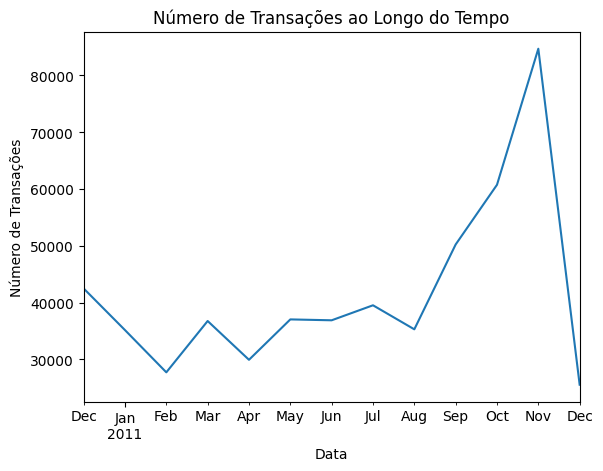

In [27]:
# Exploração Adicional de Variáveis

# Converter InvoiceDate para o tipo de dado datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Visualizar a distribuição temporal das transações
df.set_index('InvoiceDate').resample('M').size().plot()
plt.title('Número de Transações ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Transações')
plt.show()

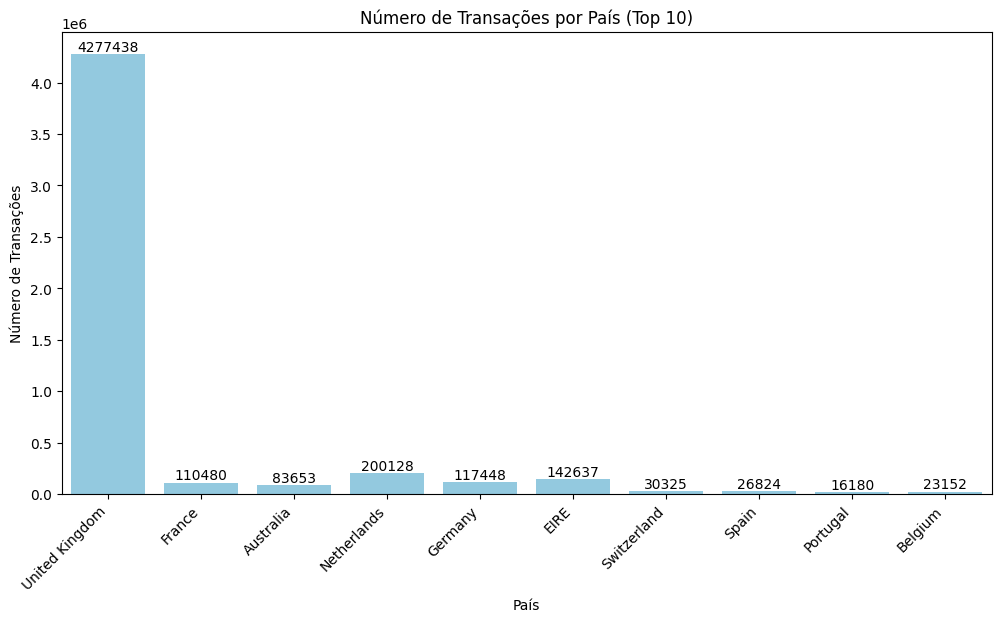

In [49]:
# Calcular o número de transações por país
transactions_per_country = df['Country'].value_counts()

# Selecionar os top 10 países com mais vendas
top_countries = transactions_per_country.nlargest(10)

# Filtrar os dados apenas para os 10 países selecionados
top_countries_data = df[df['Country'].isin(top_countries.index)]

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Country', y='Quantity', data=top_countries_data, errorbar=None, estimator=sum, color='skyblue')

# Adicionar a quantidade no final de cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Número de Transações por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Número de Transações')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Exibir todos os valores únicos na coluna "Description"
unique_descriptions = df['Description'].unique()

# Exibir a lista de valores únicos
print(unique_descriptions)

# Contar quantos valores únicos existem na coluna "Description"
num_unique_descriptions = df['Description'].nunique()

# Exibir o número de valores únicos
print("Número de valores únicos em 'Description':", num_unique_descriptions)

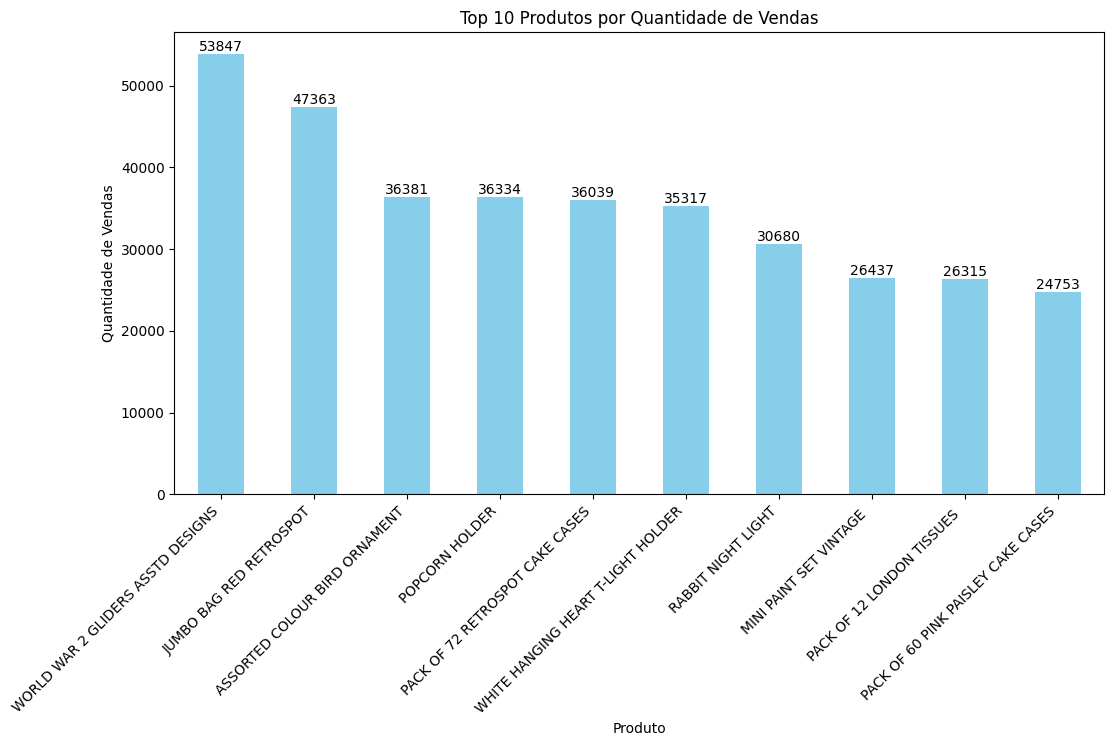

In [39]:
# Contagem de vendas por produto
product_counts = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Plotando o gráfico de barras com anotações
plt.figure(figsize=(12, 6))
bars = product_counts.head(10).plot(kind='bar', color='skyblue')

# Adicionando os números acima das barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Top 10 Produtos por Quantidade de Vendas')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

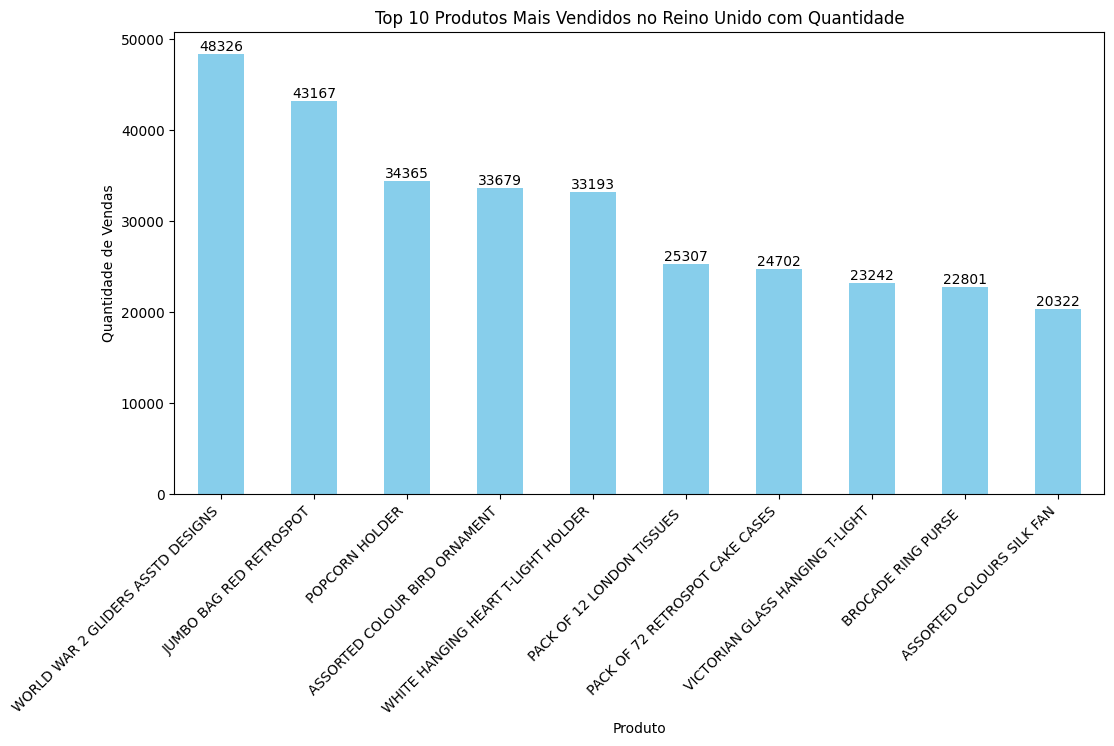

In [44]:
# Filtrar os dados para incluir apenas transações no "United Kingdom"
uk_data = df[df['Country'] == 'United Kingdom']

# Agrupar por descrição e calcular a quantidade total
top_products_uk = uk_data.groupby('Description')['Quantity'].sum().nlargest(10)

# Plotar o gráfico de barras com anotações
plt.figure(figsize=(12, 6))
bars = top_products_uk.plot(kind='bar', color='skyblue')

# Adicionar as quantidades acima das barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Top 10 Produtos Mais Vendidos no Reino Unido com Quantidade')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

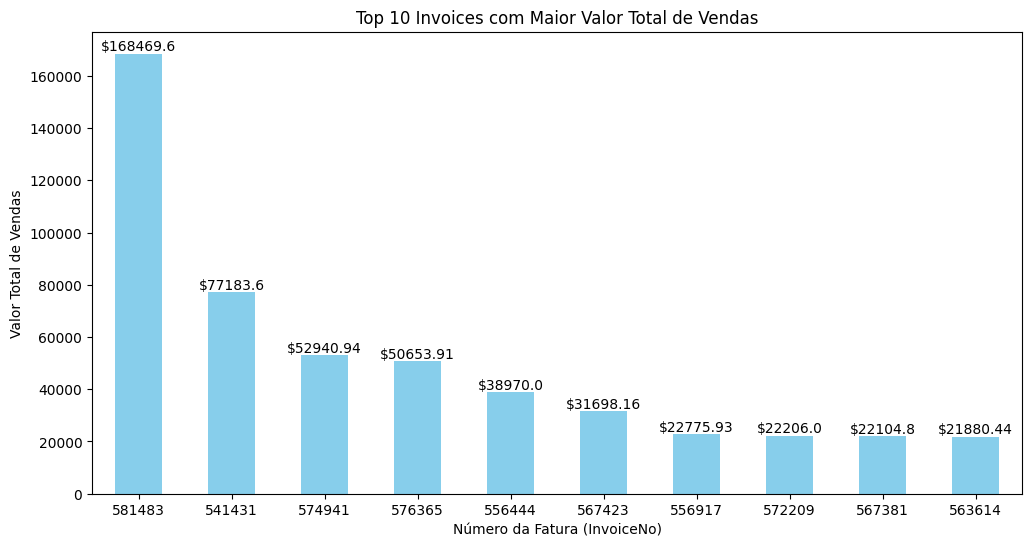

In [45]:
# Calculando o valor total (preço * quantidade) para cada fatura
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

# Agrupar por InvoiceNo e calcular o valor total
top_invoices = df.groupby('InvoiceNo')['TotalValue'].sum().nlargest(10)

# Plotar o gráfico de barras com anotações
plt.figure(figsize=(12, 6))
bars = top_invoices.plot(kind='bar', color='skyblue')

# Adicionar os valores acima das barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${round(yval, 2)}", ha='center', va='bottom')

plt.title('Top 10 Invoices com Maior Valor Total de Vendas')
plt.xlabel('Número da Fatura (InvoiceNo)')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=0, ha='center')
plt.show()

In [46]:
# Encontrar a fatura com o maior valor total
invoice_max_value = df.groupby('InvoiceNo')['TotalValue'].sum().idxmax()

# Filtrar o DataFrame para incluir apenas a fatura com o maior valor
invoice_details = df[df['InvoiceNo'] == invoice_max_value]

# Exibir as informações da fatura com o maior valor
print("Detalhes da Fatura com Maior Valor Total:")
print(invoice_details)

Detalhes da Fatura com Maior Valor Total:
       InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalValue  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom    168469.6  


<ipython-input-57-99e7ad9413e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_customers_data['TotalValue'] = pd.to_numeric(top_customers_data['TotalValue'], errors='coerce')
<ipython-input-57-99e7ad9413e5>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bars = sns.barplot(x='CustomerID', y='TotalValue', data=top_customers_data, ci=None, estimator=sum, color='skyblue')


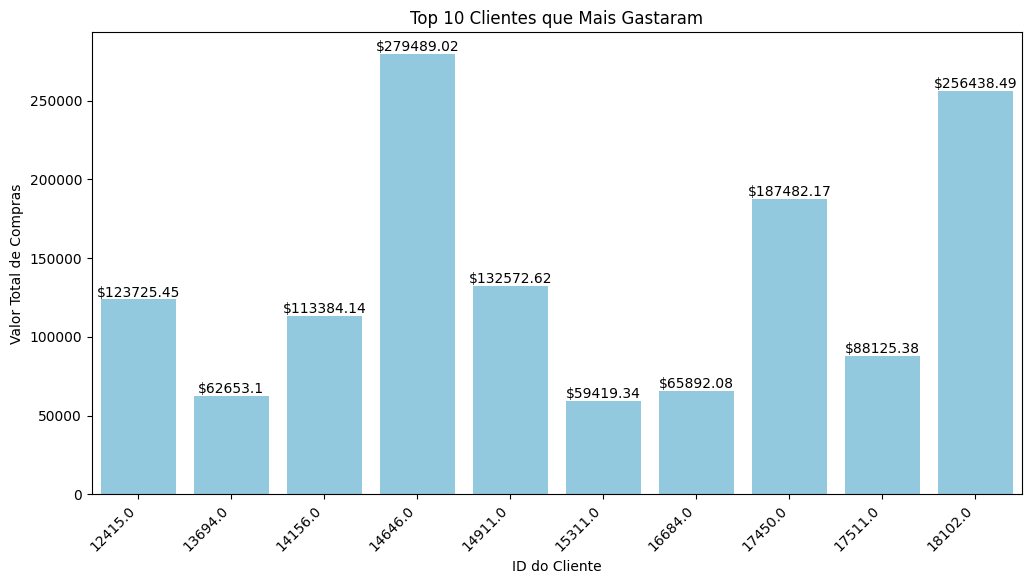

In [57]:
# Calcular o valor total de compras por cliente
total_purchase_per_customer = df.groupby('CustomerID')['TotalValue'].sum()

# Selecionar os Top 10 clientes que mais gastaram e ordenar pelo valor total
top_customers = total_purchase_per_customer.nlargest(10)

# Filtrar os dados apenas para os Top 10 clientes
top_customers_data = df[df['CustomerID'].isin(top_customers.index)]

# Converter a coluna 'TotalValue' para numérica durante a filtragem
top_customers_data['TotalValue'] = pd.to_numeric(top_customers_data['TotalValue'], errors='coerce')

# Ordenar os Top 10 clientes pelo valor total de compras
top_customers_data = top_customers_data.sort_values(by='TotalValue', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='CustomerID', y='TotalValue', data=top_customers_data, ci=None, estimator=sum, color='skyblue')

# Adicionar o valor total no final de cada barra
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${round(yval, 2)}", ha='center', va='bottom')

plt.title('Top 10 Clientes que Mais Gastaram')
plt.xlabel('ID do Cliente')
plt.ylabel('Valor Total de Compras')
plt.xticks(rotation=45, ha='right')
plt.show()